# K -평균 군집분석 (K- means clustering)
- k개의 집단으로 데이터를 분류하는 알고리즘
- 찾아야 하는 결과값을 몰라도 적용할 수 있는 방법(비지도학습:Unsupervised Learning)
- 파라미터로 전달 받은 군집의 수 k에 따라 각각의 군집의 중심점을 기준으로 분류
- 각 군집에 속하는 데이터들 간의 응집도를 최대로(거리를 최소화하는) k개의 군집으로 분할
    - 분할하고자 하는 k개의 군집 개수를 파라미터로 전달
    - 각 군집별 중심과 군집 내 데이터간의 거리 제곱합을 최소로 하는 군집ㅇ르 찾는 것이 알고리즘의 주 목표
    - 임의로 선택한 k개의 중심점을 기준으로 분할한 수 각각의 데이터에 대해 가장 가까운 중심에 연결지어 분할하고 이 작업을 반복
    - 소속 군집이 변경되지 않거나 중심점이 변하지 않는 상태가 되면 반복을 중지하여 종료

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# species
# ['setosa', 'versicolor', 'virginica'] = [0,1,2]
iris['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
map_dict={}
for i,s in enumerate(iris['species'].unique()):
    map_dict[s]=i

In [5]:
map_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [6]:
iris['species']=iris['species'].map(map_dict)

In [7]:
iris['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [8]:
# dataset 추출
# 독립변수 중에서 관계 및 특성ㅇ르 파악할 변수 2개 추출
sample1=iris[['sepal_length','petal_length']]

In [9]:
# K means 모델 생성
# 모델 객체 생성
# fit
# predict
# 초기값 : 3개
model=KMeans(n_clusters=3)

In [10]:
# 모델 학습
model.fit(sample1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# 모델 예측결과 반환
result1=model.predict(sample1)

In [12]:
iris['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
result1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### 아래 단계(라벨 인코딩~정확도)까지는 KMeans clustering에서 유효하지 않은 결과

In [14]:
# 라벨 인코딩
# 문제점
model_pred=pd.Series(result1)

In [16]:
# 원래 하면 안됨
# 비지도 학습의 라벨링이기 때문에 실제값과 라벨이 다르다
model_pred=model_pred.map({1:0,2:1,0:2})

In [17]:
pred=model_pred.values

In [18]:
true=iris['species'].values

In [25]:
# 정확도를 구할 수 있는 기능제공
from sklearn import metrics
metrics.adjusted_rand_score(pred,true)

0.6988627672348092

In [26]:
# 입력변수 데이터와 KMeans 결과 데이터 합치기
sample1['cluster']=pred

In [27]:
sample1.head()

,sepal_length,petal_length,cluster
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


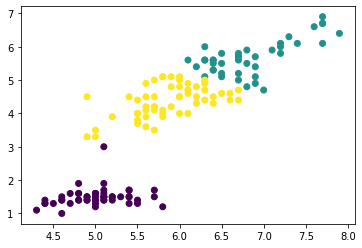

In [28]:
plt.scatter(sample1['sepal_length'],sample1['petal_length'],c=sample1['cluster'])

In [29]:
# 군집 중심점 시각화
model.cluster_centers_

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49215686],
       [6.83902439, 5.67804878]])

In [30]:
centers=pd.DataFrame(model.cluster_centers_,columns=sample1.columns[:-1])
centers

,sepal_length,petal_length
0,5.874138,4.393103
1,5.007843,1.492157
2,6.839024,5.678049


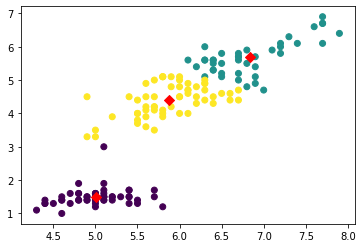

In [31]:
# 군집 결과 시각화
# 군집의 중심점 시각화
plt.scatter(sample1['sepal_length'],sample1['petal_length'],c=sample1['cluster'])
plt.scatter(centers['sepal_length'],centers['petal_length'],s=50,marker='D',c='r')

# Inertia value
- KMeansModel.inertia_
- 군집의 응집도
    - 각 중심점에서 군집 내 데이터간의 거리 합산 값
    - 적정 군집수를 판단하기 위한 계수
    - 값이 작을 수록 응집도가 높고 군집이 잘 된 분할
    - 여러 개의 k값을 비교할 때 inertia 값의 변화가 줄어드는 구간부터 군집이 완성된 군집을 이뤘다고 해석

In [32]:
model.inertia_

53.809978644106934

In [33]:
# 1개부터 10개까지 초기값 생성 및 KMeans 적용
# inertia_
sample2=iris[['sepal_length','petal_length']]

In [34]:
sample2.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [35]:
tmp=[]
for k in range(1,11):
    model2=KMeans(n_clusters=k)
    model2.fit(sample2)
    tmp.append(model2.inertia_)
tmp=pd.Series(tmp)

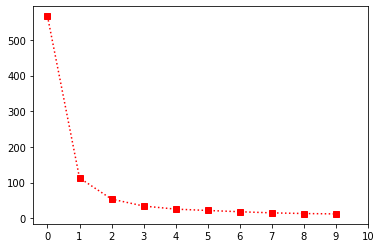

In [36]:
plt.plot(tmp,'rs:')
plt.xticks(range(11))
plt.show()

In [37]:
diff=[]
for i in range(10):
    if i == 0:
        diff.append(tmp[i])
    else:
        diff.append(abs(tmp[i]-tmp[i-1]))

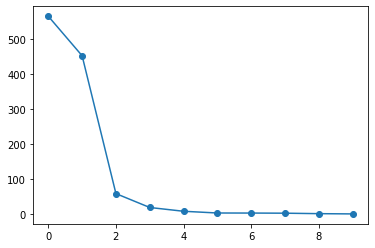

In [38]:
plt.plot(diff,'o-')

In [39]:
t=pd.DataFrame({'inertia':tmp,
                'diff':diff})
t

,inertia,diff
0,566.493733,566.493733
1,112.992072,453.501662
2,53.809979,59.182093
3,34.317021,19.492958
4,25.634065,8.682956
5,21.908013,3.726052
6,18.351223,3.556790
7,15.180993,3.170230
8,13.334788,1.846205
9,12.227120,1.107668


In [40]:
# 변동 비율
t['diff'] / t['diff'].sum()

0    0.505455
1    0.404637
2    0.052805
3    0.017393
4    0.007747
5    0.003325
6    0.003174
7    0.002829
8    0.001647
9    0.000988
Name: diff, dtype: float64

# 파이프라인
- 스케일링을 적용하여 데이터 변환
- 스케일된 데이터를 모델에 입력하여 학습
- 위의 두 단계를 따로따로 실행하지 않고 sklearn.pipeline을 이용하여 쉽게 구현 가능
- pipline.fit과 pipeline.predict 메서드를 이용하여 모델을 학습시키고 예측 수행

In [ ]:
# 일반적인 객체 사용 순서
# 스케일링 객체 생성
# 스케일링 객체에 데이터를 넣고 변환시킨 값 저장
# 변환시킨 값을 모델 객체에 넣고 학습시킨 후 예측/분류 수행

In [41]:
# pipeline, scaler 라이브러리 불러오기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
model=KMeans(n_clusters=3)

In [44]:
pipe=make_pipeline(scaler,model)

In [45]:
# pipeline으로 전처리 후 모델 학습을 동시에 실행
pipe.fit(sample2)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [46]:
pipe_pred=pipe.predict(sample2)

In [47]:
pipe_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2])